## 数据预处理

In [1]:
import re
import os
# import jieba
# from hanziconv import HanziConv

In [2]:
top_dir = '/Users/qiujiafa/Downloads/wikiextractor-master'

In [3]:
wikipedia_dir = '/Users/qiujiafa/Downloads/wikiextractor-master/wikipedia_extracted'

In [4]:
wikipedia_dir_new = '/Users/qiujiafa/Downloads/wikiextractor-master/wikipedia_extracted_new'

In [5]:
test_file = '/Users/qiujiafa/Downloads/wikiextractor-master/wikipedia_extracted/AA'

In [ ]:
# 安装汉字繁简转换库
 !pip install hanziconv


In [ ]:
def conv_to_simple_chinese(sentence):
    """ 中文繁体转简体 """
    return HanziConv.toSimplified(sentence)

In [ ]:
# 测试处理一个文件夹下所有文件，读取，切词并存入新的文件中
for path, dirs, file_list in os.walk(test_file):
    for file in file_list[:1]:
        with open(os.path.join(test_file, file), 'r') as f:
            lines = [l.strip() for l in f.readlines() if len(l) > 10 and not l.startswith('<doc')][:20]
            result = []
            for i, line in enumerate(lines):
                if line:  
                    line_simple = re.sub('[{，。：；？、（）()/,~#}]+', '', conv_to_simple_chinese(line))
#                 print(line_simple)
                word_list = [word for word in jieba.cut(line_simple)]
                result.append(word_list)
            with open(os.path.join(wikipedia_dir_new, file+'_new'), 'w') as f_w:
                for line in result:
                    f_w.write(' '.join(line) + '\n')
                
            

In [ ]:
# 正式处理 wikipedia 下的每个文件夹下每个文件，统一处理并最终所有文件存放在 wikipedia_extracted_new 的文件下，提供模型训练数据
# 一秒处理 1m 大小的文件，可用多线程处理 I/O 密集型任务
for path, dirs, _ in os.walk(wikipedia_dir):
    for dir in dirs[1:]:
        for sub_path,_, file_list in os.walk(os.path.join(path, dir)):
            for file in file_list:
#                 print(dir + '_' + file)
                with open(os.path.join(sub_path, file), 'r') as f:
                    lines = [l.strip() for l in f.readlines() if len(l) > 10 and not l.startswith('<doc')]
                    result = []
                    for i, line in enumerate(lines):
                        if line:  
                            line_simple = re.sub('[{，。：；？、（）()/,~#}]+', '', conv_to_simple_chinese(line))
                        word_list = [word for word in jieba.cut(line_simple)]
                        result.append(word_list)
                new_file_name = dir + '_' + file + '_new'
                with open(os.path.join(wikipedia_dir_new, new_file_name), 'w') as f_w:
                    for line in result:
                        f_w.write(' '.join(line) + '\n')
                print(f'Successfully write into {os.path.join(wikipedia_dir_new, new_file_name)}')
        print(f'finish process dir {dir}')


##  模型训练 test

In [ ]:
# def get_corpus_memory_friendly(file):
    class MyCorpus(object):
        def __iter__(self):
            for line in open('/Users/qiujiafa/Downloads/wikiextractor-master/wikipedia_extracted_new/AF_wiki_39_new', 'r'):
             # assume there's one document per line, tokens separated by whitespace
                 yield line.split()
            

In [6]:
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim.models import word2vec

In [7]:
for file_path, _, file_list in os.walk(wikipedia_dir_new):
    #  拿部分文件做模型训练测试
    corpus_test = []
    for file in file_list[:1]:
        sentences = word2vec.LineSentence(datapath(os.path.join(wikipedia_dir_new, file)))
        for sentence in sentences:
            corpus_test.append(sentence)
#         with open(os.path.join(wikipedia_dir_new, file), 'r') as f:
#             for line in f.readlines():
#                 corpus_test.append(line.split())
        

/Users/qiujiafa/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [6]:
help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.models.base_any2vec.BaseWordEmbeddingsModel)
 |  Word2Vec(sentences=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, cbow_mean=1, hashfxn=<built-in function hash>, iter=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=())
 |  
 |  Class for training, using and evaluating neural networks described in https://code.google.com/p/word2vec/
 |  
 |  If you're finished training a model (=no more updates, only querying)
 |  then switch to the :mod:`gensim.models.KeyedVectors` instance in wv
 |  
 |  The model can be stored/loaded via its :meth:`~gensim.models.word2vec.Word2Vec.save()` and
 |  :meth:`~gensim.models.word2vec.Word2Vec.load()` methods, or stored/loaded in a format
 |  compatible with the original word2vec implementation via `wv.save_word2vec_format()`
 |  an

In [7]:
model_test1 = Word2Vec(corpus_file='/Users/qiujiafa/Downloads/wikiextractor-master/wikipedia_extracted_new/AF_wiki_39_new',
                      size = 100,
                      window=20,
                      min_count=1,
                      workers=4
                     )

TypeError: 'module' object is not callable

In [8]:
model_test = Word2Vec(sentences=corpus_test,
                      size = 100,
                      window=20,
                      min_count=10,
                      workers=4
                     )

In [12]:
model_test.wv['数学']

array([ 0.03042153,  0.0667038 ,  0.06626721, -0.13826387,  0.03647718,
        0.15736936, -0.1613455 ,  0.02809197, -0.03491479, -0.02756419,
        0.13046569,  0.0659842 ,  0.01848412, -0.10986785, -0.20403484,
        0.04848466,  0.11116042,  0.03010035,  0.00469928,  0.07928512,
       -0.21352115,  0.15874948, -0.14005901, -0.14372687,  0.10510339,
        0.06868127, -0.03040643,  0.00192521, -0.08596434,  0.14227761,
       -0.05108332, -0.07532936, -0.04646562, -0.0006711 , -0.11249988,
       -0.2596932 , -0.07376091, -0.08070322,  0.00676023,  0.10083587,
       -0.01301886, -0.14335981, -0.03789145,  0.07296943,  0.1267385 ,
        0.01590351, -0.1537688 ,  0.29076007,  0.10172202,  0.07488312,
       -0.06397161, -0.06232985, -0.00200735, -0.19018534,  0.02091192,
        0.09873031, -0.20353109, -0.16095085,  0.06013173,  0.05048352,
       -0.2710867 ,  0.07140183, -0.21722136,  0.03979136, -0.0083074 ,
       -0.02584227,  0.0043613 , -0.01944051, -0.06865089, -0.06

In [13]:
model_test.wv.most_similar(['美丽'])

KeyError: "word '美丽' not in vocabulary"

In [ ]:
model_test.wv.most_similar(['周星驰'])

In [ ]:
model_test.save('word2vec_test.model')

## data visualazation

In [14]:
from gensim.models import Word2Vec

In [2]:
model = Word2Vec.load('word2vec_test.model')

/Users/qiujiafa/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [19]:
%matplotlib notebook

In [20]:

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/qiujiafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


<IPython.core.display.Javascript object>


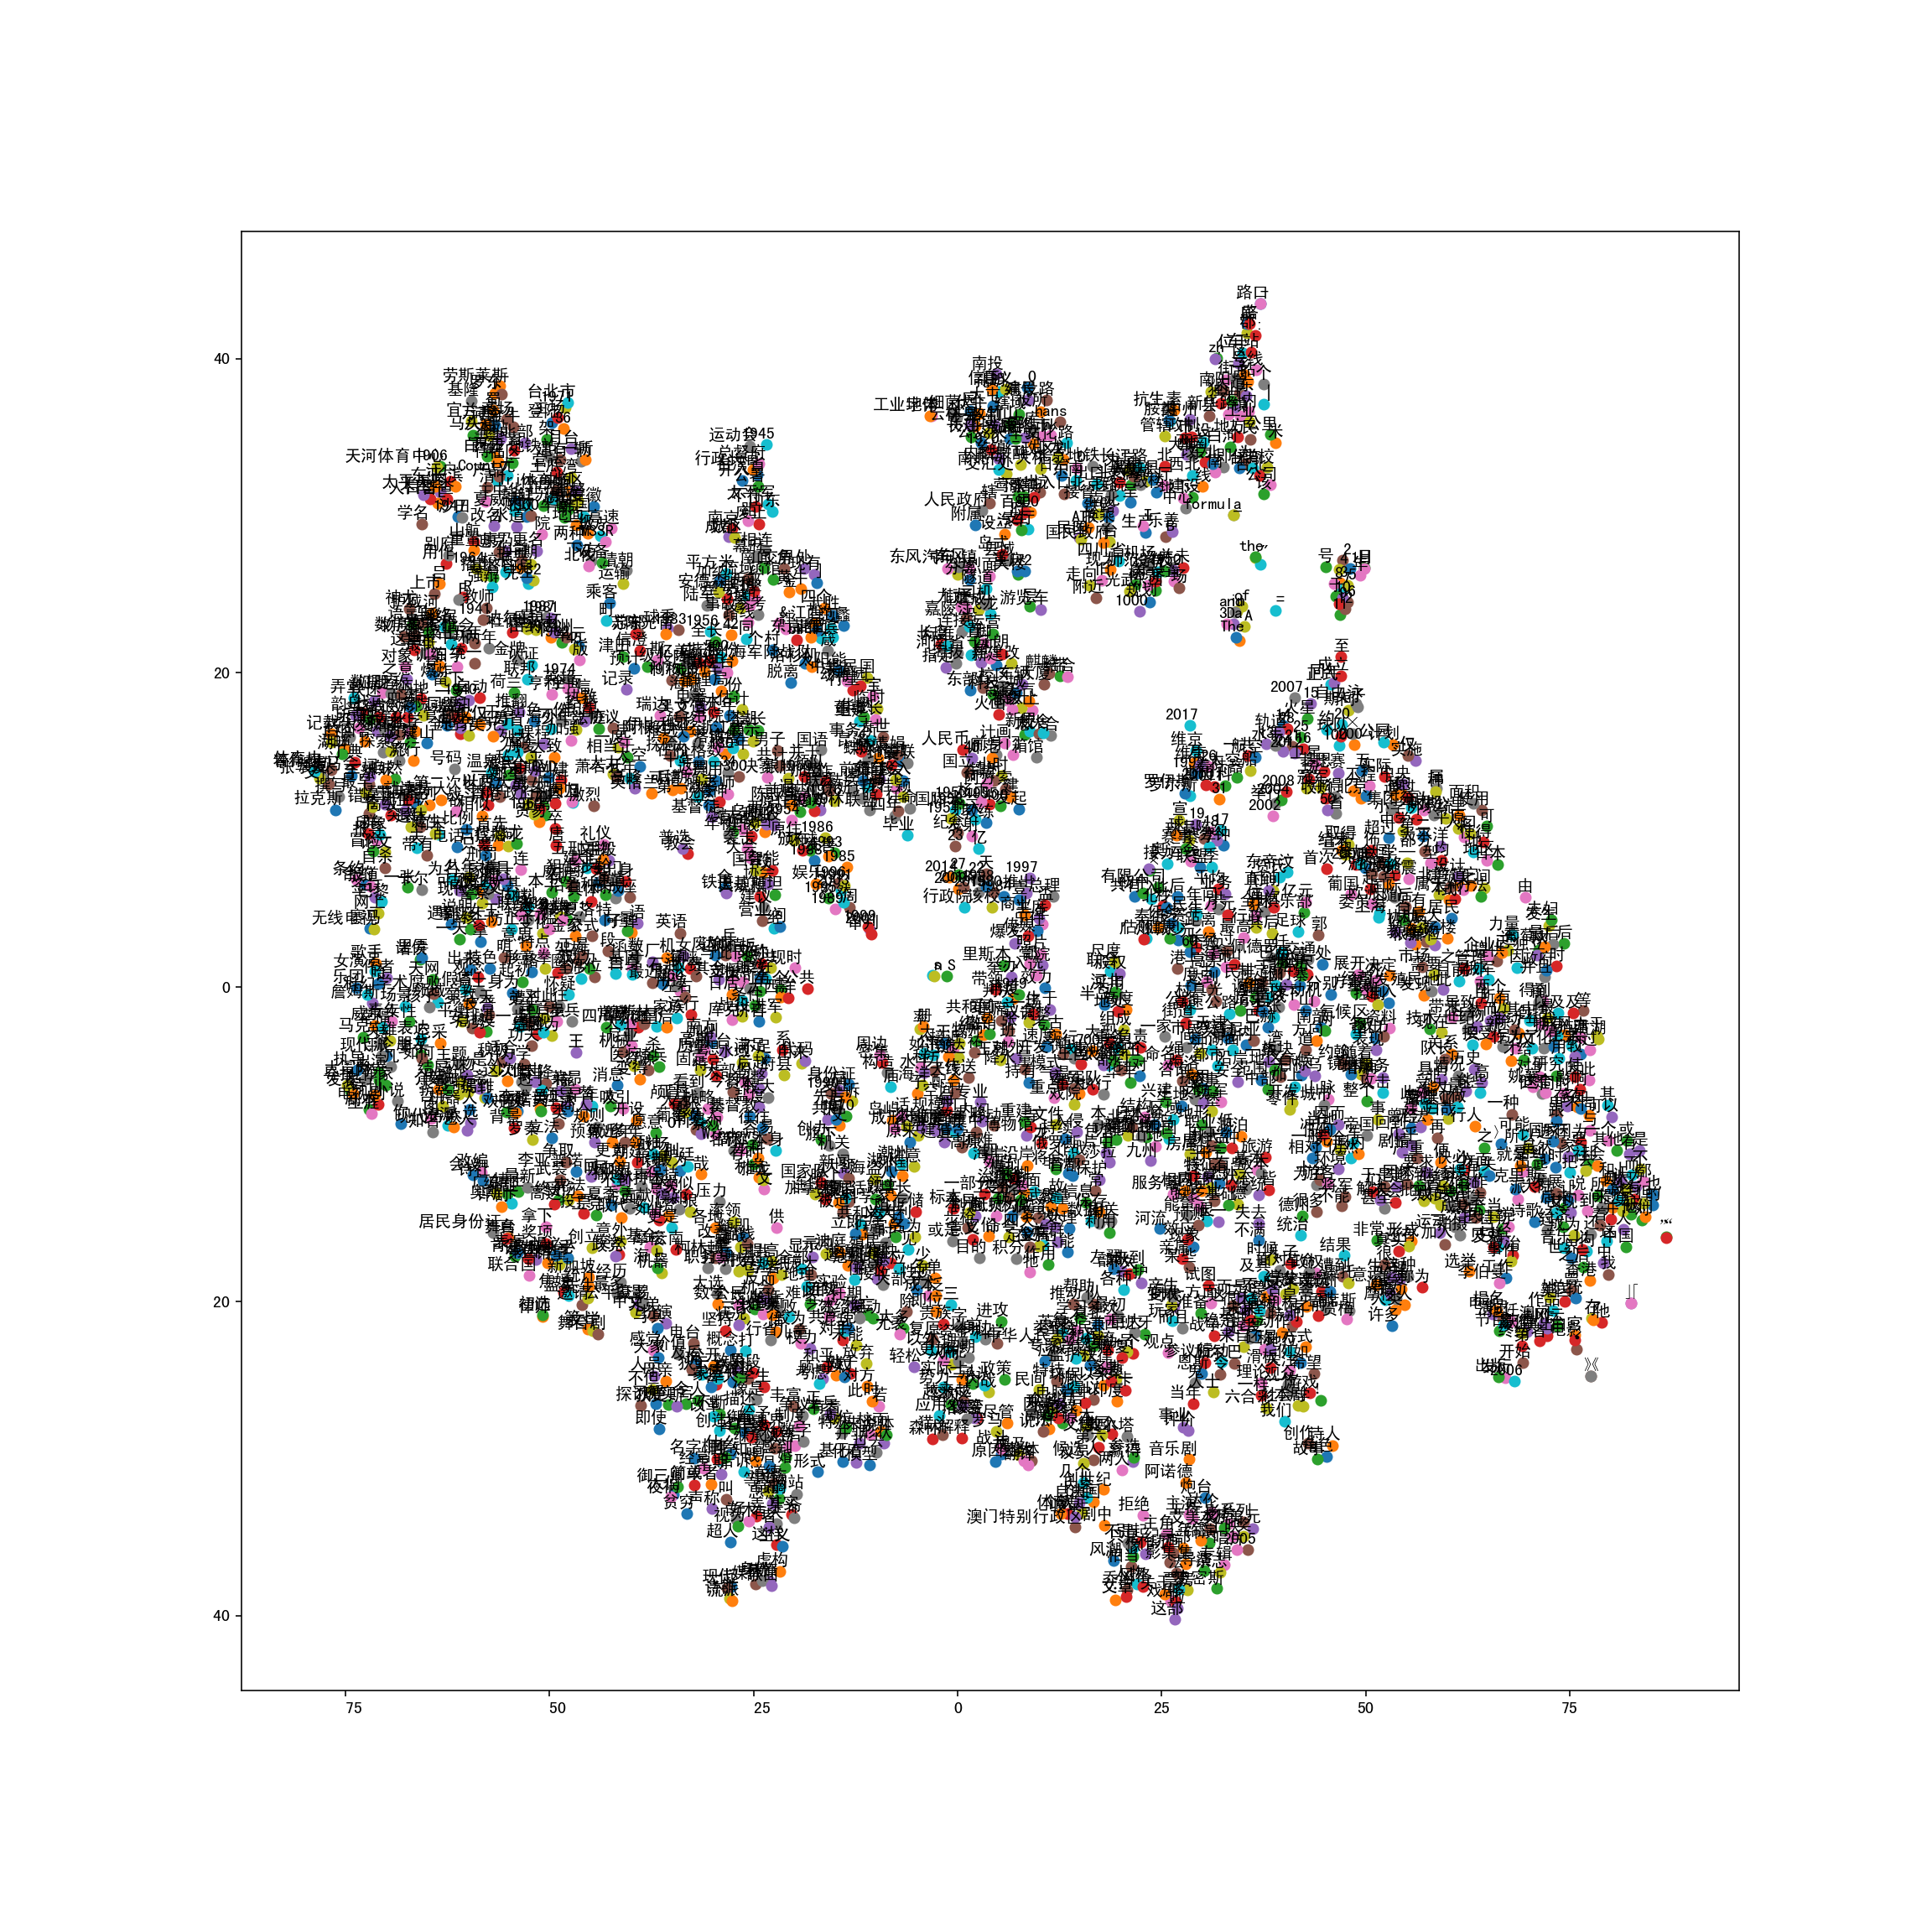

In [21]:
tsne_plot(model_test)

In [ ]:
model.wv.most_similar(['周星驰'])

In [17]:
import matplotlib
print(matplotlib.__path__)

['/Users/qiujiafa/anaconda3/lib/python3.7/site-packages/matplotlib']
